# Deep Learning for Image Classification

------------

## The Problem

**The problem is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset.**

## The Data

**The data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images.**

**There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

In [46]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [47]:
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

## Visualizing the Data

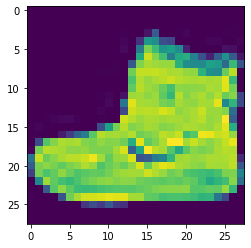

In [48]:
from matplotlib.pyplot import imshow
sample_image = x_train[0]
imshow(sample_image)

## Preprocessing the Data

In [49]:
x_train[0].max()

255

In [50]:
# Normalize the X train and X test data by dividing by the max value of the image arrays.
X_train = x_train/255
X_test = x_test/255

In [51]:
# Reshape the X arrays to include a 4 dimension of the single channel.**
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

image_size = X_train.shape[1:]
image_size

(28, 28, 1)

In [52]:
# Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.
from tensorflow.keras.utils import to_categorical

y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)

## Building the Model

**We are going to use Keras to create a model consisting of at least the following layers:**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**And compile the model with these parameters:**

* loss='categorical_crossentropy', 
*optimizer='rmsprop', 
*metrics=['accuracy']

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=image_size, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop',
              metrics='accuracy')

In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [55]:
# Train the model to the x_train set
model.fit(x=X_train,
          y=y_cat_train,
          batch_size=16,
          epochs=3,
          validation_data=(X_test, y_cat_test),
         )

Epoch 1/3
3750/3750 [==============================] - 33s 9ms/step - loss: 0.5162 - accuracy: 0.8207 - val_loss: 0.3626 - val_accuracy: 0.8747
Epoch 2/3
3750/3750 [==============================] - 32s 8ms/step - loss: 0.2946 - accuracy: 0.8962 - val_loss: 0.3091 - val_accuracy: 0.8930
Epoch 3/3
3750/3750 [==============================] - 31s 8ms/step - loss: 0.2627 - accuracy: 0.9063 - val_loss: 0.3186 - val_accuracy: 0.8884


In [69]:
model.save('my_h5_model.h5')

### Evaluating the Model

**We are going to show the `accuracy`, `precision`, `recall`, `f1-score` the model achieved on the x_test data set.**

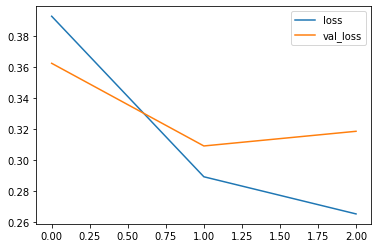

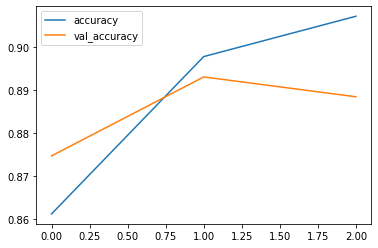

In [78]:
import pandas as pd
metrics = pd.DataFrame(model.history.history)
metrics[['loss', 'val_loss']].plot();
metrics[['accuracy', 'val_accuracy']].plot();

In [80]:
from sklearn.metrics import classification_report

In [85]:
preds = model.predict_classes(X_test)
preds.shape

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


(10000,)

In [87]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.86      0.78      0.82      1000
           3       0.90      0.91      0.91      1000
           4       0.88      0.73      0.80      1000
           5       0.96      0.98      0.97      1000
           6       0.60      0.81      0.69      1000
           7       0.96      0.94      0.95      1000
           8       0.99      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000

